## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [4]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [6]:
import requests
response = requests.get(target_url)
data = response.text
# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))


784594


In [7]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
data_split = data.split('\n',len(data))
arrange_data = []
for i in range(len(data_split)):
    arrange_data.append(data_split[i].split('\t',len(data_split[i])))

## 將 txt 轉成 pandas dataframe

In [8]:
import pandas as pd

    
df = pd.DataFrame(arrange_data)
df.head()

0                                                  1
0  n00015388_157  http://farm1.static.flickr.com/145/430300483_2...
1  n00015388_238  http://farm2.static.flickr.com/1005/3352960681...
2  n00015388_304  http://farm1.static.flickr.com/27/51009336_a96...
3  n00015388_327  http://farm4.static.flickr.com/3025/2444687979...
4  n00015388_355  http://img100.imageshack.us/img100/3253/forres...

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

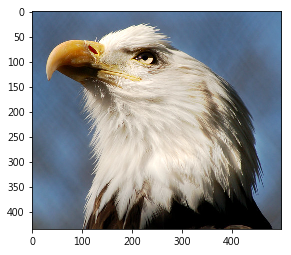

In [10]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.iloc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [31]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list =  []
    for i in range(len(url_list)):
        try: 
            response = requests.get(url_list[i])
            img_list.append(Image.open(BytesIO(response.content)))
        except:
            img_list.append('')
    return img_list

Total images that we got: 40 


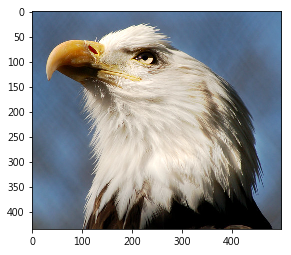

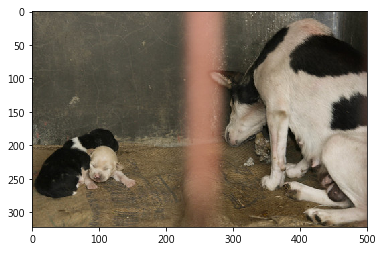

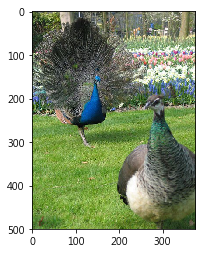

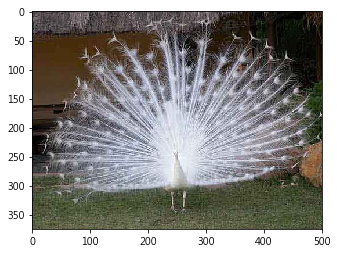

此連結找不到
此連結找不到
此連結找不到
此連結找不到
此連結找不到


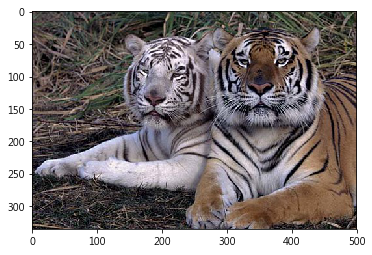

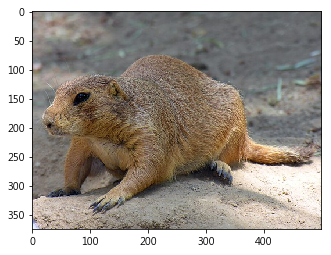

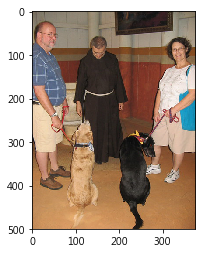

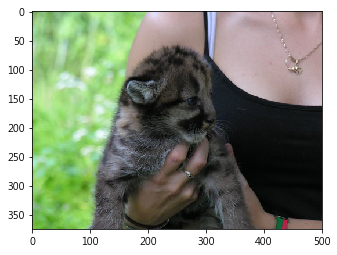

此連結找不到
此連結找不到
此連結找不到


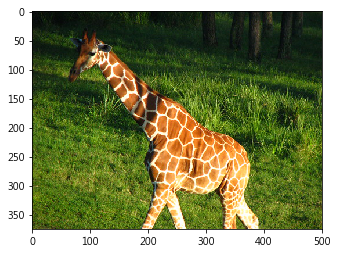

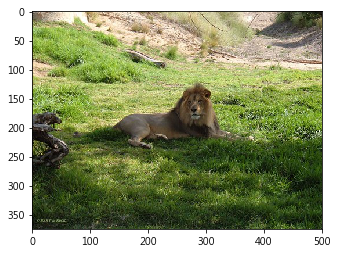

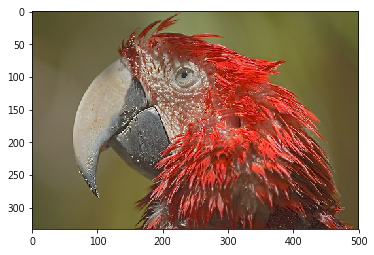

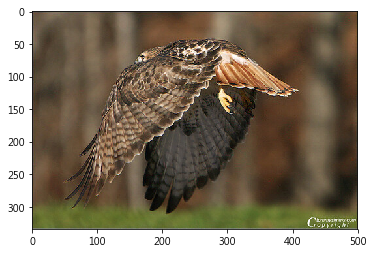

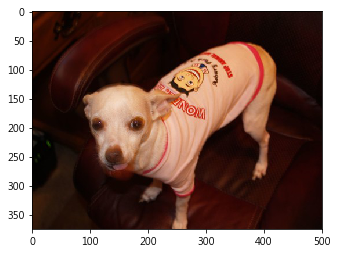

此連結找不到
此連結找不到
此連結找不到


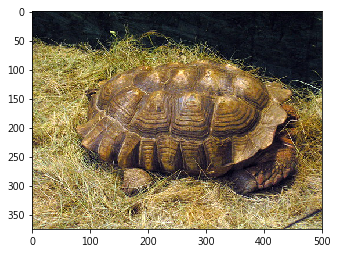

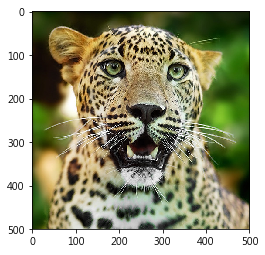

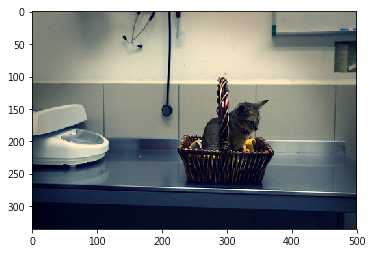

此連結找不到


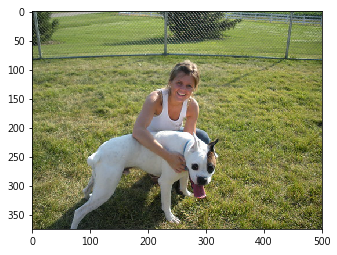

此連結找不到
此連結找不到


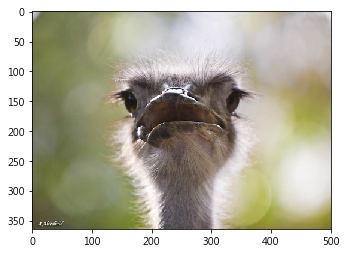

此連結找不到


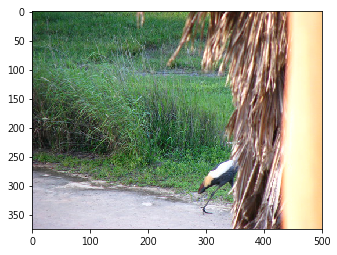

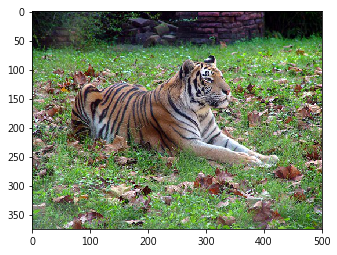

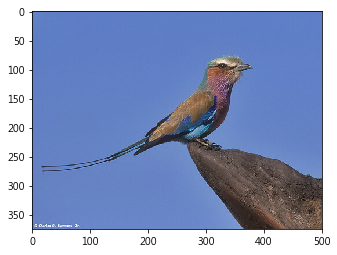

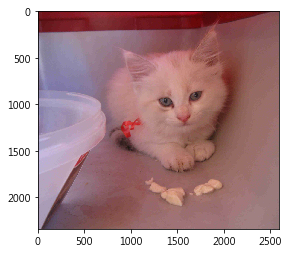

此連結找不到


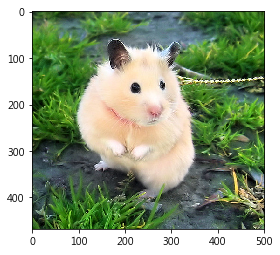

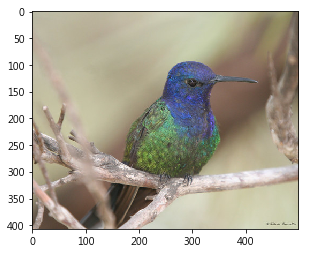

In [33]:

result = img2arr_fromURLs(df[0:40][1])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    if im_get != '':
        plt.imshow(im_get)
        plt.show()
    else:
        print('此連結找不到')